# Double Jet

With various grid resolutions

In [1]:
from gpuocean.SWEsimulators import ModelErrorKL, CDKLM16
from gpuocean.utils import Common, IPythonMagic

from importlib import reload

import numpy as np
import pycuda.driver as cuda
from matplotlib import pyplot as plt

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"


In [2]:
%cuda_context_handler gpu_ctx

In [3]:
gpu_stream = cuda.Stream()

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

Get initial arguments from class

In [5]:
from gpuocean.utils import DoubleJetCase

In [6]:
L = 10

In [7]:
sim_model_error_time_step = 60.0

In [8]:
T = 3*24*60*60

In [9]:
sims = []

Prepare KL model error

In [10]:
sim_model_error_basis_args = {
                            "basis_x_start": 2, 
                            "basis_x_end": 8,
                            "basis_y_start": 1,
                            "basis_y_end": 7,

                            "kl_decay": 1.25,
                            "kl_scaling": 0.025,
                            }

1024 x 2048

In [11]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**L, nx=2**(L+1))
doubleJetCase_args, doubleJetCase_init = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

In [12]:
grid_args = {"nx" : doubleJetCase_args["nx"],
             "ny" : doubleJetCase_args["ny"],
             "dx" : doubleJetCase_args["dx"],
             "dy" : doubleJetCase_args["dy"],
             "gpu_ctx" : doubleJetCase_args["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : doubleJetCase_args["boundary_conditions"]
             }


sim_mekl1 = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args, xorwow_seed=1, np_seed=1)

In [13]:
sim1 = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim1.model_error = sim_mekl1
sim1.model_time_step = sim_model_error_time_step

In [14]:
sim1.dataAssimilationStep(T)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

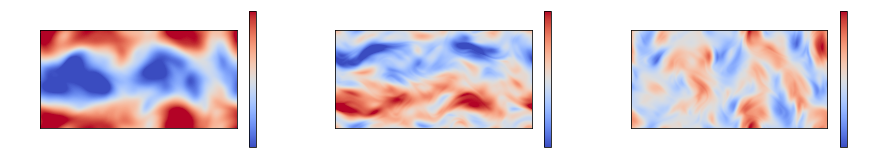

In [15]:
from utils.DoubleJetPlot import *
imshowSim(sim1)

(<Figure size 1080x216 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

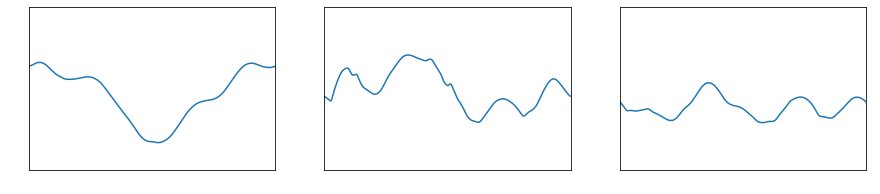

In [16]:
crossSectionSim(sim1)

In [17]:
sims.append(sim1)

512 x 1024

In [18]:
L = 9

In [19]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**L, nx=2**(L+1))
doubleJetCase_args, doubleJetCase_init = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

In [20]:
grid_args = {"nx" : doubleJetCase_args["nx"],
             "ny" : doubleJetCase_args["ny"],
             "dx" : doubleJetCase_args["dx"],
             "dy" : doubleJetCase_args["dy"],
             "gpu_ctx" : doubleJetCase_args["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : doubleJetCase_args["boundary_conditions"]
             }

sim_mekl2 = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args, xorwow_seed=1, np_seed=1)

In [21]:
sim2 = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim2.model_error = sim_mekl2
sim2.model_time_step = sim_model_error_time_step

In [22]:
sim2.dataAssimilationStep(T)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

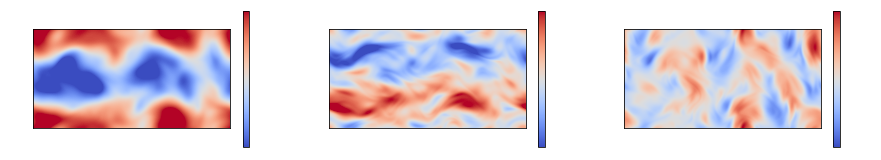

In [23]:
imshowSim(sim2)

(<Figure size 1080x216 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

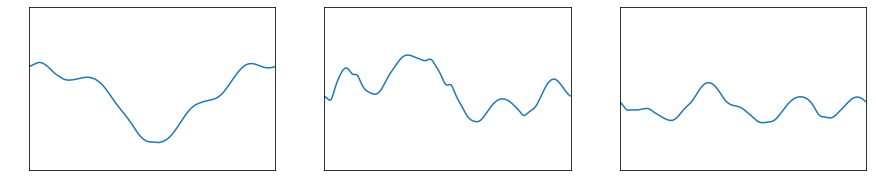

In [24]:
crossSectionSim(sim2)

In [25]:
sims.append(sim2)

256 x 512

In [26]:
L = 8

In [27]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**L, nx=2**(L+1))
doubleJetCase_args, doubleJetCase_init = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

In [28]:
grid_args = {"nx" : doubleJetCase_args["nx"],
             "ny" : doubleJetCase_args["ny"],
             "dx" : doubleJetCase_args["dx"],
             "dy" : doubleJetCase_args["dy"],
             "gpu_ctx" : doubleJetCase_args["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : doubleJetCase_args["boundary_conditions"]
             }

sim_mekl3 = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args, xorwow_seed=1, np_seed=1)

In [29]:
sim3 = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim3.model_error = sim_mekl3
sim3.model_time_step = sim_model_error_time_step

In [30]:
sim3.dataAssimilationStep(T)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

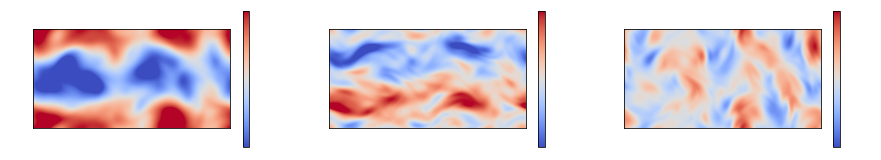

In [31]:
imshowSim(sim3)

(<Figure size 1080x216 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

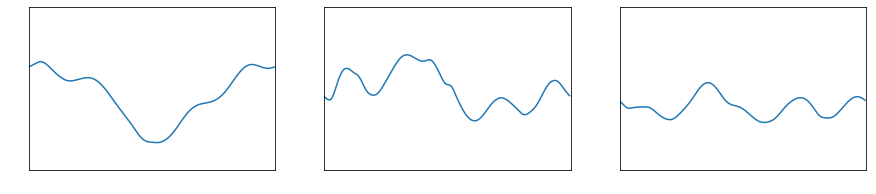

In [32]:
crossSectionSim(sim3)

In [33]:
sims.append(sim3)

128 x 256

In [34]:
L = 7

In [35]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**L, nx=2**(L+1))
doubleJetCase_args, doubleJetCase_init = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

In [36]:
grid_args = {"nx" : doubleJetCase_args["nx"],
             "ny" : doubleJetCase_args["ny"],
             "dx" : doubleJetCase_args["dx"],
             "dy" : doubleJetCase_args["dy"],
             "gpu_ctx" : doubleJetCase_args["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : doubleJetCase_args["boundary_conditions"]
             }

sim_mekl4 = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args, xorwow_seed=1, np_seed=1)

In [37]:
sim4 = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim4.model_error = sim_mekl4
sim4.model_time_step = sim_model_error_time_step

In [38]:
sim4.dataAssimilationStep(T)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

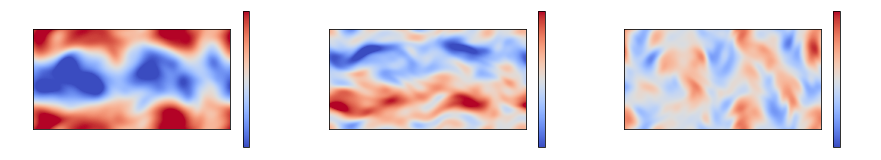

In [39]:
imshowSim(sim4)

(<Figure size 1080x216 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

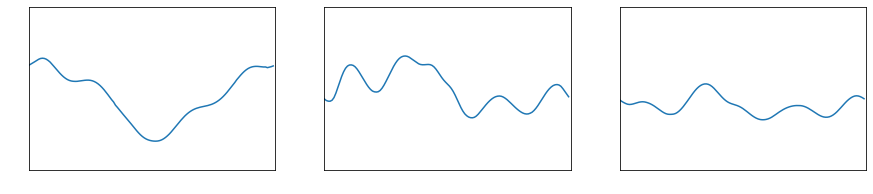

In [40]:
crossSectionSim(sim4)

In [41]:
sims.append(sim4)

64 x 128

In [42]:
L = 6

In [43]:
doubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, DoubleJetCase.DoubleJetPerturbationType.SteadyState, ny=2**L, nx=2**(L+1))
doubleJetCase_args, doubleJetCase_init = doubleJetCase.getInitConditions()
doubleJetCase_args["dt"] = 0.0

In [44]:
grid_args = {"nx" : doubleJetCase_args["nx"],
             "ny" : doubleJetCase_args["ny"],
             "dx" : doubleJetCase_args["dx"],
             "dy" : doubleJetCase_args["dy"],
             "gpu_ctx" : doubleJetCase_args["gpu_ctx"],
             "gpu_stream": gpu_stream,
             "boundary_conditions" : doubleJetCase_args["boundary_conditions"]
             }

sim_mekl5 = ModelErrorKL.ModelErrorKL(**grid_args, **sim_model_error_basis_args, xorwow_seed=1, np_seed=1)

In [45]:
sim5 = CDKLM16.CDKLM16(**doubleJetCase_args, **doubleJetCase_init)
sim5.model_error = sim_mekl5
sim5.model_time_step = sim_model_error_time_step

In [46]:
sim5.dataAssimilationStep(T)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

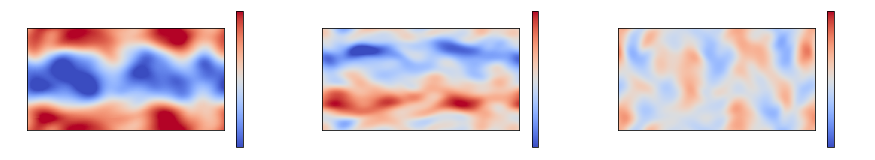

In [47]:
imshowSim(sim5)

(<Figure size 1080x216 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

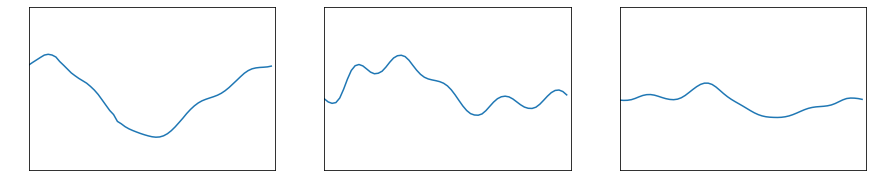

In [48]:
crossSectionSim(sim5)

In [57]:
sims.append(sim5)

Comparison

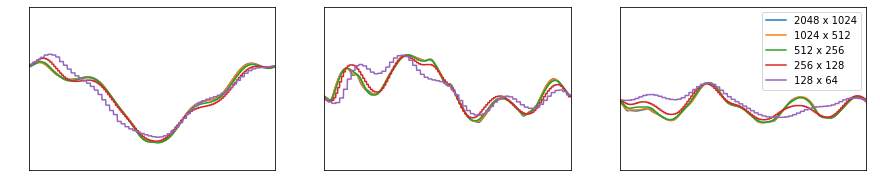

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))

axs[0].set_xlim((0, 1024))
axs[0].set_ylim((-3.5,3.5))

axs[1].set_xlim((0, 1024))
axs[1].set_ylim((-900,900))

axs[2].set_xlim((0, 1024))
axs[2].set_ylim((-900,900))


for l_idx, sim in enumerate(sims):
    eta, hu, hv = sim.download(interior_domain_only=True)
    x_idx = int(eta.shape[1]/2)
    axs[0].plot(eta[:,x_idx].repeat(2**l_idx))
    axs[1].plot(hu[:,x_idx].repeat(2**l_idx))
    axs[2].plot(hv[:,x_idx].repeat(2**l_idx), label=str(eta.shape[1])+" x "+str(eta.shape[0]))

plt.legend(labelcolor="black")
